
<div class="alert alert-block alert-info"><font size="5"><center><b><u> Sprint 9_Tasca Feature Engineering  
   </u></b></center></font>
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>*Aprèn a gestionar paràmetres amb Python*</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler.</span>

https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

#### <span style=color:green><b> Dataset MLB </span>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import timeit
import random

In [2]:
Mlb = pd.read_csv('MLB.txt', sep='\t', encoding='utf-8')

In [3]:
Mlb.shape

(828, 4)

In [4]:
Mlb.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [5]:
Mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


#### <span style=color:green><b> Normalització dels atributs categòrics en dummy </span>

In [6]:
# Create dummy variables
dummy_team_type = pd.get_dummies(Mlb['team'], prefix='team', drop_first=True)
dummy_position_type = pd.get_dummies(Mlb['position'], prefix='position', drop_first=True)

# Drop unnecessary columns and columns that will remain str and unable to normalize numerical atributs
to_drop = ['player', 'team', 'position']
Mlb.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
MlbDum = pd.concat([Mlb, dummy_team_type, dummy_position_type], axis=1)
MlbDum.head()

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,8500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,8250.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5250.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
MlbDum.describe().round(4)

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
count,828.0000,828.0000,828.0000,828.000,828.0000,828.0000,828.0000,828.000,828.0000,828.0000,...,828.0000,828.0000,828.0000,828.0000,828.0000,828.0000,828.0000,828.0000,828.0000,828.0000
mean,3281.8283,0.0326,0.0314,0.035,0.0326,0.0314,0.0314,0.035,0.0338,0.0326,...,0.0362,0.0362,0.0085,0.0507,0.0048,0.1787,0.4952,0.0580,0.0676,0.0556
std,4465.4490,0.1777,0.1745,0.184,0.1777,0.1745,0.1745,0.184,0.1809,0.1777,...,0.1870,0.1870,0.0916,0.2196,0.0694,0.3834,0.5003,0.2338,0.2513,0.2292
min,400.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,418.3150,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1093.7500,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,4250.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
max,33000.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### <span style=color:green><b> Se estandarditza els atributs numèrics amb StandardScaler </span>

<span style=color:green> Com es la distribución de 'salary'? normal? </span>

(array([443.,  69.,  54.,  48.,  31.,  31.,  15.,  21.,  16.,  16.,  10.,
          5.,  16.,  11.,   5.,   6.,   9.,   3.,   1.,   5.,   7.,   2.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  400.        ,  1305.55555556,  2211.11111111,  3116.66666667,
         4022.22222222,  4927.77777778,  5833.33333333,  6738.88888889,
         7644.44444444,  8550.        ,  9455.55555556, 10361.11111111,
        11266.66666667, 12172.22222222, 13077.77777778, 13983.33333333,
        14888.88888889, 15794.44444444, 16700.        , 17605.55555556,
        18511.11111111, 19416.66666667, 20322.22222222, 21227.77777778,
        22133.33333333, 23038.88888889, 23944.44444444, 24850.        ,
        25755.55555556, 26661.11111111, 27566.66666667, 28472.22222222,
        29377.77777778, 30283.33333333, 31188.88888889, 32094.44444444,
        33000.        ]),
 <BarContainer object of 36 artists>)

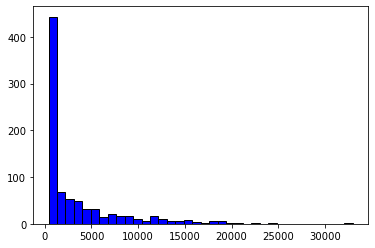

In [8]:
plt.hist(MlbDum['salary'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

<span style=color:green> Com que no tenim una distribució normal, aplicarem una normalització amb MinMaxScaler </span>
    
https://interactivechaos.com/es/manual/tutorial-de-machine-learning/minmaxscaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
transformed_MlbDum = scaler.fit_transform(MlbDum.iloc[:, :])
transformed_MlbDum = pd.DataFrame(transformed_MlbDum)
transformed_MlbDum.columns = MlbDum.columns
transformed_MlbDum.head()

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,0.248466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.240798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.148773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.128834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.125767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
transformed_MlbDum.describe().round(3)

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
count,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,...,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000,828.000
mean,0.088,0.033,0.031,0.035,0.033,0.031,0.031,0.035,0.034,0.033,...,0.036,0.036,0.008,0.051,0.005,0.179,0.495,0.058,0.068,0.056
std,0.137,0.178,0.175,0.184,0.178,0.175,0.175,0.184,0.181,0.178,...,0.187,0.187,0.092,0.220,0.069,0.383,0.500,0.234,0.251,0.229
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.021,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.118,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


(array([443.,  69.,  54.,  48.,  31.,  31.,  15.,  21.,  16.,  16.,  10.,
          5.,  16.,  11.,   5.,   6.,   9.,   3.,   1.,   5.,   7.,   2.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.94444444,
        0.97222222, 1.        ]),
 <BarContainer object of 36 artists>)

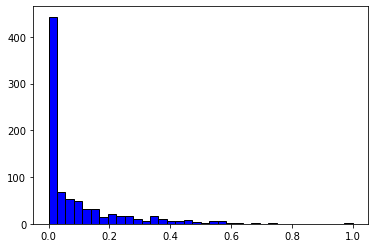

In [11]:
plt.hist(transformed_MlbDum['salary'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.<span>

<span style=color:green>*El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información. Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.*<span>
    
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.cienciadedatos.net/documentos/py19-pca-python.html

In [12]:
MlbDum.head()

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,8500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,8250.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5250.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<span style=color:green> Let's reduce dataset to the columns of position before to run the PCA </span>

In [13]:
MlbDumPosition=MlbDum.iloc[:, -8:]
MlbDumPosition.head()

,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0


In [14]:
MlbDumPosition.shape

(828, 8)

#### <span style=color:green><b> Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables </span>

<span style=color:green> Valor promedio </span>

In [15]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
MlbDumPosition.mean(axis=0)

----------------------
Media de cada variable
----------------------


position_Designated Hitter    0.008454
position_First Baseman        0.050725
position_Infielder            0.004831
position_Outfielder           0.178744
position_Pitcher              0.495169
position_Second Baseman       0.057971
position_Shortstop            0.067633
position_Third Baseman        0.055556
dtype: float64

<span style=color:green> Dispersión de las variables </span>

In [16]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
MlbDumPosition.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


position_Designated Hitter    0.008393
position_First Baseman        0.048210
position_Infielder            0.004813
position_Outfielder           0.146972
position_Pitcher              0.250279
position_Second Baseman       0.054676
position_Shortstop            0.063135
position_Third Baseman        0.052533
dtype: float64

<span style=color:green> Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable position_Pitcher, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales. </span>

<span style=color:green><b> We will PCA & StandardScaler </span>

In [17]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Preprocesado y modelado
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(MlbDumPosition)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [19]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = MlbDumPosition.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8']
)

,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
PC1,0.060558,0.165627,0.045380,0.505107,-0.779616,0.180759,0.200880,0.175728
PC2,0.076049,0.284628,0.055870,-0.709101,-0.132221,0.335408,0.420089,0.317493
PC3,-0.019286,-0.193412,-0.013711,0.039068,0.013568,-0.453572,0.808607,-0.317409
PC4,0.006909,0.132740,0.004867,-0.011446,-0.004156,-0.697337,-0.084095,0.699149
PC5,0.012748,0.863216,0.008917,-0.018485,-0.006888,-0.250363,-0.099772,-0.426136
PC6,0.956586,-0.095098,0.229821,-0.039970,-0.018131,-0.085933,-0.076823,-0.088711
PC7,-0.246353,-0.039575,0.966202,-0.018062,-0.008342,-0.036335,-0.032981,-0.037331
PC8,-0.119250,-0.284210,-0.090353,-0.487974,-0.611612,-0.302382,-0.324516,-0.296489


<span style=color:green> La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap. </span>

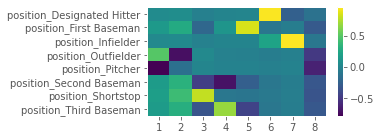

In [20]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(MlbDumPosition.columns)), MlbDumPosition.columns)
plt.xticks(range(len(MlbDumPosition.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

<span style=color:green><b> Número óptimo de componentes principales </span>

<span style=color:green> Una forma de proceder muy extendida consiste en evaluar la proporción de varianza explicada acumulada y seleccionar el número de componentes mínimo a partir del cual el incremento deja de ser sustancial. </span>

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.19236821 0.14301943 0.1335469  0.13252049 0.1318949  0.12628018
 0.12568085 0.01468902]


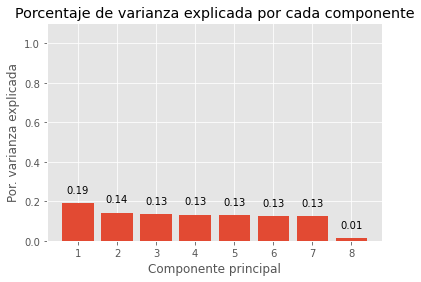

In [21]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(MlbDumPosition.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.19236821 0.33538765 0.46893455 0.60145504 0.73334994 0.85963012
 0.98531098 1.        ]


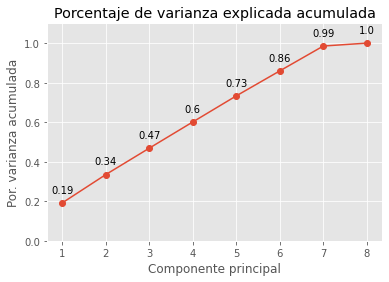

In [22]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(MlbDumPosition.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(MlbDumPosition.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

<span style=color:green> Si se empleasen únicamente las 6 primeras componentes se conseguiría explicar el 86% de la varianza observada.. </span>

<span style=color:green><b> Transformación. </span>

<span style=color:green> Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes. </span>

In [23]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=MlbDumPosition)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8'],
    index   = MlbDumPosition.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.211435,-0.152750,0.014636,-0.004449,-0.007339,-0.018495,-0.008469,-0.072570
1,-1.211435,-0.152750,0.014636,-0.004449,-0.007339,-0.018495,-0.008469,-0.072570
2,0.347869,0.111704,-0.012500,0.003864,0.006438,0.017770,0.008216,1.150712
3,-1.211435,-0.152750,0.014636,-0.004449,-0.007339,-0.018495,-0.008469,-0.072570
4,1.102658,1.408802,-0.893910,0.608781,3.940251,-0.415606,-0.172135,-0.144481


<span style=color:green> Seleccionamos el modelo PCA con 5 componentes. </span>

In [24]:
proyecciones.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-1.211435,-0.152750,0.014636,-0.004449,-0.007339
1,-1.211435,-0.152750,0.014636,-0.004449,-0.007339
2,0.347869,0.111704,-0.012500,0.003864,0.006438
3,-1.211435,-0.152750,0.014636,-0.004449,-0.007339
4,1.102658,1.408802,-0.893910,0.608781,3.940251
...,...,...,...,...,...
823,-1.211435,-0.152750,0.014636,-0.004449,-0.007339
824,1.147822,1.784600,3.207570,-0.331022,-0.390880
825,-1.211435,-0.152750,0.014636,-0.004449,-0.007339
826,-1.211435,-0.152750,0.014636,-0.004449,-0.007339


# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.<span>


<span style=color:green> Let's compare the effect of scalers on data with outliers of variable 'salary'. </span>

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Techniques of Outlier Detection and Treatment
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three

In [25]:
Mlb1 = pd.read_csv('MLB.txt', sep='\t', encoding='utf-8')

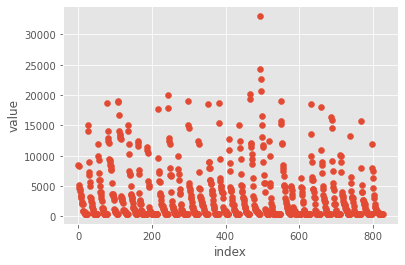

In [26]:
plt.scatter(Mlb1.index, Mlb1.salary)
plt.xlabel("index")
plt.ylabel("value")
plt.show()

<AxesSubplot:>

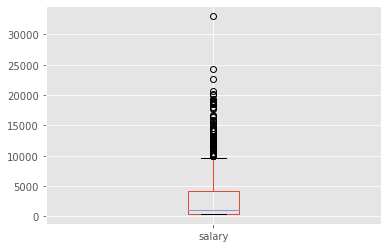

In [27]:
Mlb1['salary'].plot.box()

<span style=color:green> Let's remove salary > 20M$. </span>

In [28]:
Mlb1.loc[Mlb1['salary'] > 20000]

,player,team,position,salary
466,Johan Santana,New York Mets,Pitcher,20144.707
494,Alex Rodriguez,New York Yankees,Third Baseman,33000.000
495,CC Sabathia,New York Yankees,Pitcher,24285.714
496,Derek Jeter,New York Yankees,Shortstop,22600.000
497,Mark Teixeira,New York Yankees,First Baseman,20625.000


In [29]:
Mlb1.drop( Mlb1[ Mlb1['salary'] > 20000 ].index , inplace=True)

In [30]:
Mlb1.shape

(823, 4)

In [31]:
Mlb1.describe()

,salary
count,823.000000
mean,3155.162143
std,4155.537822
min,400.000000
25%,418.000000
50%,1075.000000
75%,4192.500000
max,20000.000000


<span style=color:green> Com s'ha d'esperar, quitant outliers es redueix la deviació estandard </span>

In [32]:
# Create dummy variables
dummy_team_type = pd.get_dummies(Mlb1['team'], prefix='team', drop_first=True)
dummy_position_type = pd.get_dummies(Mlb1['position'], prefix='position', drop_first=True)

# Drop unnecessary columns and columns that will remain str and unable to normalize numerical atributs
to_drop = ['player', 'team', 'position']
Mlb1.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
MlbDum1 = pd.concat([Mlb1, dummy_team_type, dummy_position_type], axis=1)
MlbDum1.head()

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,8500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,8250.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5250.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
transformed_MlbDum1 = scaler.fit_transform(MlbDum1.iloc[:, :])
transformed_MlbDum1 = pd.DataFrame(transformed_MlbDum1)
transformed_MlbDum1.columns = MlbDum1.columns
transformed_MlbDum1.head().round(3)

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,0.413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
transformed_MlbDum1.describe().round(3)

,salary,team_Atlanta Braves,team_Baltimore Orioles,team_Boston Red Sox,team_Chicago Cubs,team_Chicago White Sox,team_Cincinnati Reds,team_Cleveland Indians,team_Colorado Rockies,team_Detroit Tigers,...,team_Toronto Blue Jays,team_Washington Nationals,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
count,823.000,823.000,823.000,823.000,823.000,823.000,823.000,823.000,823.000,823.000,...,823.000,823.000,823.000,823.000,823.000,823.000,823.000,823.000,823.000,823.000
mean,0.141,0.033,0.032,0.035,0.033,0.032,0.032,0.035,0.034,0.033,...,0.036,0.036,0.009,0.050,0.005,0.180,0.496,0.058,0.067,0.055
std,0.212,0.178,0.175,0.184,0.178,0.175,0.175,0.184,0.181,0.178,...,0.188,0.188,0.092,0.218,0.070,0.384,0.500,0.234,0.250,0.227
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.034,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.193,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### <span style=color:green> Other option with RobustScaler. </span>
6.3.1.3. Scaling data with outliers
https://scikit-learn.org/stable/modules/preprocessing.html